In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar
from matplotlib.ticker import ScalarFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date']= pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

In [13]:
# Clean data
upper_percentile = df['value'].quantile(0.025)
lower_percentile = df['value'].quantile(0.975)
df = df[(df['value'] > upper_percentile) &(df['value'] < lower_percentile)]

In [4]:
def draw_line_plot():
    # Draw line plot
    plt.figure(figsize = (10,5))
    df.plot(kind = 'line', y = 'value')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page views')
    plt.xticks(rotation = 45)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')
    plt.tight_layout
    fig = plt.show()
    return fig


<Figure size 1000x500 with 0 Axes>

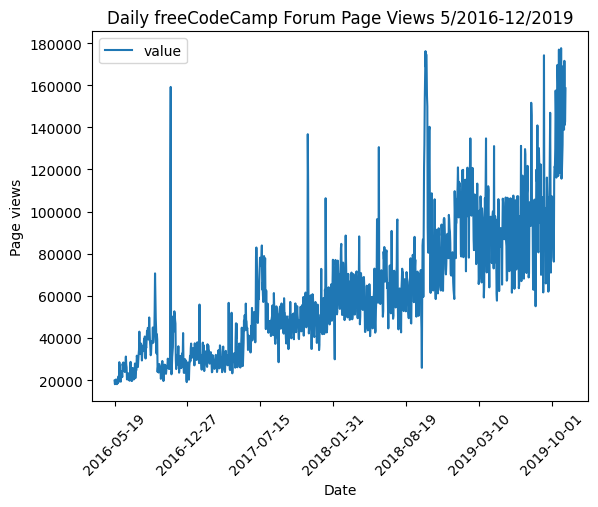

In [5]:
draw_line_plot()

In [14]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    
    df['year'] = df.index.year
    df['month'] = df.index.month_name()
    df_bar = df.groupby(['year','month'])['value'].mean().unstack()

    # Draw bar plot
    unique_months = sorted(df['month'].unique(), key=lambda x: list(calendar.month_name).index(x))
    df_bar = df.groupby(['year','month'])['value'].mean().unstack()
    df_bar.plot(kind = 'bar')
    plt.title('Average views per month')
    plt.xlabel('Years')
    plt.ylabel('Average page views')
    plt.legend(title = 'Months', labels = unique_months)
    plt.tight_layout()
    fig = plt.show()
    return fig

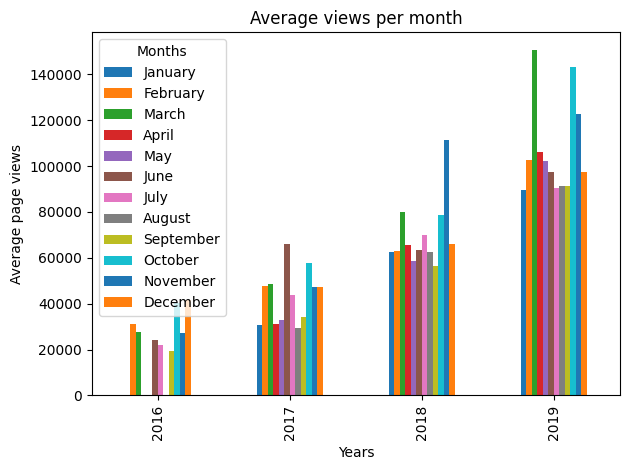

In [15]:
draw_bar_plot()

In [17]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)
    
    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(ax=axes[0], x='year', y='value', data=df_box)
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    #month wise trend
    sns.boxplot(ax=axes[1], x='month', y='value', data=df_box)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    for ax in axes:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
    plt.tight_layout()
    fig = plt.show()
    return fig

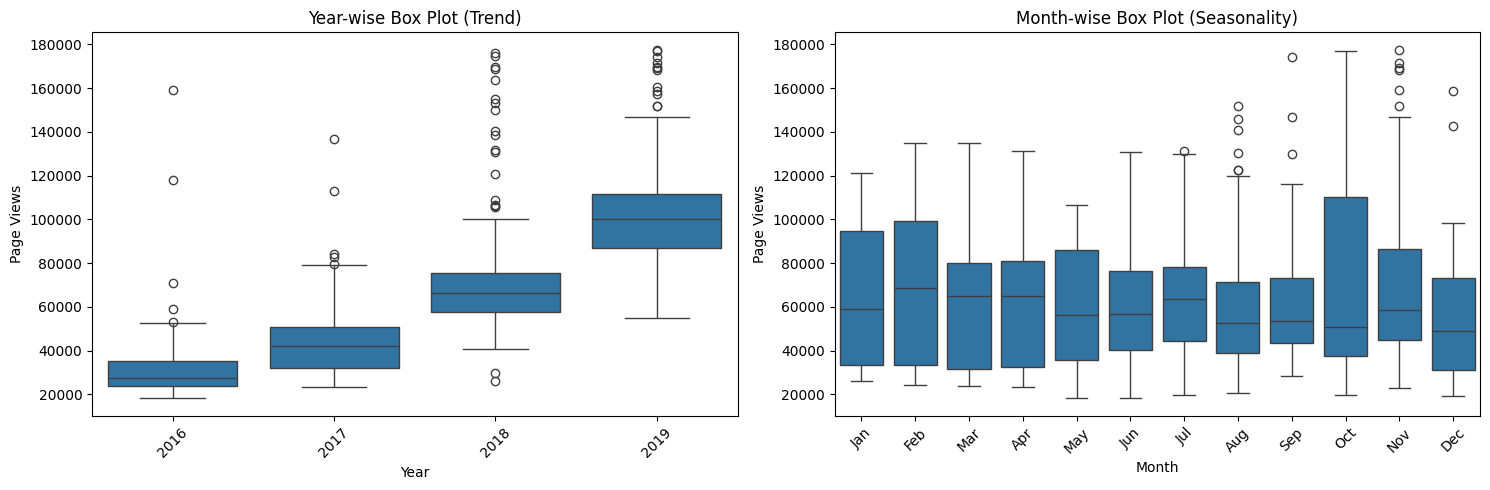

In [18]:
draw_box_plot()